In [4]:
# import analysis library 
import pandas as pd 
import numpy as np
import csv
import json
import os
import sys
from datetime import timedelta
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/g_dash/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [9]:
df.head()

,item_id,city,content_score,status,abc_dynamic,web_site,last_edit,distance_to_path,main_image,total_hq_images,...,Singles,Large_Groups,Family_Hotel,Winter_Sports_Enthusiasts,Gay_Friendly,Water_Enthusiasts,Travellers_with_pets,Adults_only,room_type,deal_connections
0,11933,Ruwais,80.0,5.0,C2,1.0,last_6_months,less than 20 Km,1.0,70.0,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,296
1,11997,Deira,71.0,5.0,B,1.0,last_6_months,less than 20 Km,1.0,26.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,394
2,12022,Sharjah,72.0,5.0,B,1.0,last_6_months,less than 20 Km,1.0,32.0,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,284
3,12023,Sharjah,73.0,5.0,B,1.0,last_6_months,less than 20 Km,1.0,58.0,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,311
4,12025,Sharjah,73.0,5.0,C2,1.0,last_6_months,less than 20 Km,1.0,5.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,302


#  Data quality 

In [12]:
df_pool =  df.groupby(['pool']).count()['item_id'].reset_index()
df_pool.columns = ['data_available','pool']
df_pool

df_pet = df.groupby(['pets']).count()['item_id'].reset_index()
df_pet.columns = ['data_available','pet']
#df_pet

df_car_park = df.groupby(['car_park']).count()['item_id'].reset_index()
df_car_park.columns = ['data_available','car_park']
#df_car_park

In [13]:
#df_car_park.merge(df_pet, left_on='data_available')

# Data non avaolable in many top filter labels 

df_top_filter = pd.merge(df_car_park, df_pet, on='data_available').merge(df_pool)

df_top_filter

,data_available,car_park,pet,pool
0,0.0,8155,10831,10693
1,1.0,4191,1515,1653


#  Content score of items 

//anaconda/envs/g_dash/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


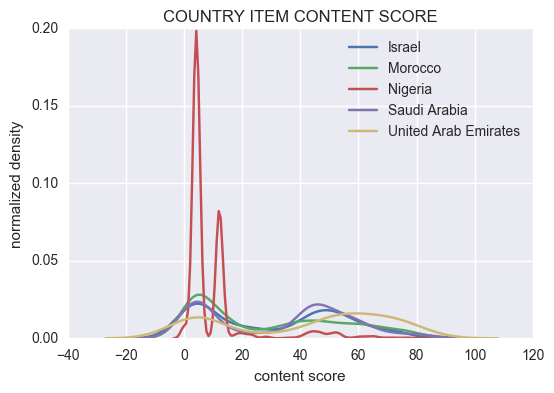

In [41]:
for country in list(df.groupby('country').count()['item_id'].reset_index()['country']):
    
    sns.kdeplot(df[df['country']== country]['content_score'], label=country)
    


plt.legend()

plt.xlabel('content score')
plt.ylabel('normalized density')
plt.title('COUNTRY ITEM CONTENT SCORE')

# Country revenue

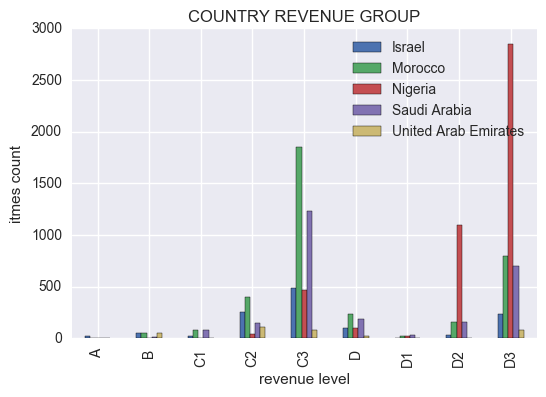

In [42]:
df_country_rev = df.groupby(['country','abc_dynamic']).count()['item_id'].reset_index()

pd.pivot_table(df_country_rev, values='item_id', index=['abc_dynamic'], columns=['country']).plot(kind='bar')


plt.legend()

plt.xlabel('revenue level')
plt.ylabel('itmes count')
plt.title('COUNTRY REVENUE GROUP')